### Image Recognition using SVM

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
X_digits, y_digits = digits.data, digits.target 

digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

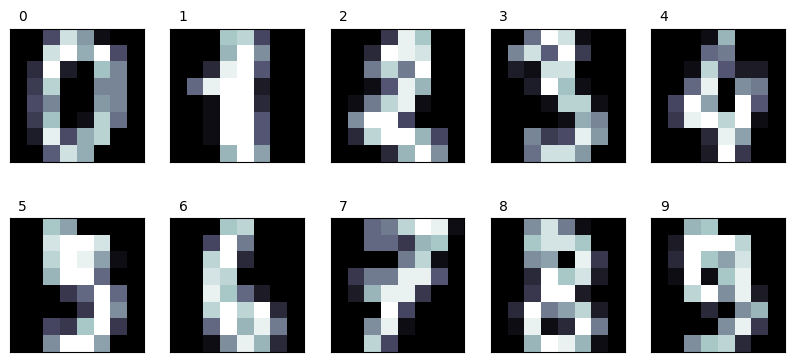

In [6]:
import matplotlib.pyplot as plt
n_row, n_col = 2,5

def print_digits(images, y, max_n = 10):
    fig = plt.figure(figsize = (2. * n_col, 2.26 * n_row))
    
    i = 0
    while i < max_n and i < images.shape[0]:
        p = fig.add_subplot(n_row, n_col, i+1, xticks =[],yticks = [])
        p.imshow(images[i], cmap = plt.cm.bone, interpolation = "nearest")
        p.text(0, -1, str(y[i]))
        i = i + 1

print_digits(digits.images, digits.target, max_n = 10) 